In [18]:
#문장 - 단어 - 키워드 - 필터링 - 집계 - 시각
from konlpy.tag import Kkma
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
from wordcloud import WordCloud # pip install wordcloud  // pip install -U pip setuptools
from collections import Counter
import numpy as np
kkma = Kkma()


In [4]:
#형태소 분석하기
data1 = open("D:/My_Jupyter/온라인 파이썬 강의/파이썬을 활용한 데이터분석 및 시각화_실습(전체)v2/7차시/경주여행_지식인_2016_2.txt").read()
data1
data2 = kkma.nouns(data1)
data3 = Counter(data2)

In [11]:
# 불용어 제거하기
stop_words = open("D:/My_Jupyter/온라인 파이썬 강의/파이썬을 활용한 데이터분석 및 시각화_실습(전체)v2/7차시/stop_words.txt").read()
data3 = [ each_word for each_word in data2
            if each_word not in stop_words]
data4 = [ ]
for i in range(0,len(data3)) :
    if len(data3[i]) >= 2 | len(data3[i]) <= 10 :
        data4.append(data3[i])

In [12]:
# 단어 별 빈도수 집계
data5 = Counter(data4)
data6 = data5.most_common(100)
tmp_data = dict(data6)

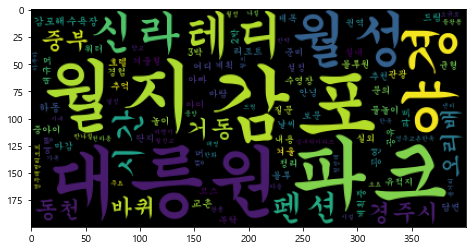

In [20]:
wordcloud = WordCloud(font_path = "C:/windows/Fonts/H2GSRB.TTF",
                      relative_scaling = 0.2,
                     background_color = 'black').generate_from_frequencies(tmp_data)
plt.figure(figsize = (8,4))
plt.imshow(wordcloud)
plt.axis('on')
plt.show()

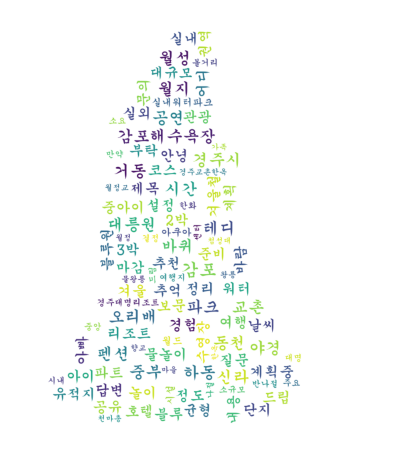

In [23]:
from PIL import Image
from wordcloud import ImageColorGenerator
alice_mask = np.array(Image.open("D:/My_Jupyter/온라인 파이썬 강의/파이썬을 활용한 데이터분석 및 시각화_실습(전체)v2/7차시/alice.jpg"))
wc = WordCloud(font_path = 'C:/windows/Fonts/H2GSRB.TTF',
              relative_scaling = 0.2, mask = alice_mask,
              background_color = 'white',
              min_font_size = 1,
              max_font_size = 40,
              max_words = 2000).generate_from_frequencies(tmp_data)
plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

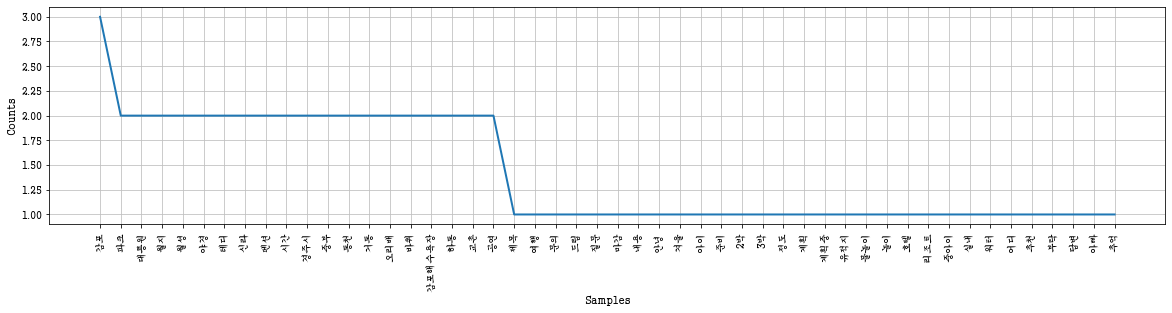

In [31]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
font_location = "C:/windows/Fonts/H2GSRB.TTF"
font_name = fm.FontProperties(fname = font_location).get_name()
rc('font', family = font_name)
import nltk
plt.figure(figsize=(20,4))
from nltk.probability import FreqDist
g_data4 = FreqDist(data4)

g_data4 = nltk.Text(data4, name = " 다빈도 단어 그래프 출력")
g_data4.plot(50)